# Trabajo Práctico Aprendizaje No Supervisado


---


## Integrantes:


*   Sofia Amante
*   Melisa Caffaratti
*   Mariano Lucero





In [125]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

from sklearn.cluster import KMeans,MeanShift
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn import preprocessing

In [126]:
pd.options.display.float_format = '{:.2f}'.format

Utilizar la base de jugadores “players_20.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv . Considerar que la base 2020 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019, ntb_clustering_2_fifa2019 y ntb3_embeddings_fifa2019). Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift, agregar alguna jerárquica vista en el teórico (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?

## 1. Análisis Exploratorio

In [127]:
#Cargamos datos Fifa 2020
df=pd.read_csv("https://raw.githubusercontent.com/melicaffa/AprendizajeNoSupervisado/master/players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.00,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.00,NaN,2004-07-01,2021.00,NaN,nan,87.00,92.00,92.00,96.00,39.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.00,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.00,NaN,2018-07-10,2022.00,LS,7.00,90.00,93.00,82.00,89.00,35.00,78.00,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.00,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.00,NaN,2017-08-03,2022.00,LW,10.00,91.00,85.00,87.00,95.00,32.00,58.00,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.00,NaN,GK,13.00,NaN,2014-07-16,2023.00,GK,1.00,nan,nan,nan,nan,nan,nan,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La variable 'Overall' se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('Crossing', 'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100

Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'.

In [128]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position.sample(10)

,team_position,short_name,overall
46,CF,K. Benzema,87
483,LWB,M. Halstenberg,80
29,RCB,Piqué,88
95,RAM,H. Ziyech,85
51,LB,Jordi Alba,87
27,RM,C. Eriksen,88
48,SUB,D. Mertens,87
21,CDM,Sergio Busquets,89
33,LCM,David Silva,88
61,RB,J. Kimmich,86


Para el análisis reducimos la cantidad de jugadores a los primeros 10mil.
Luego vamos a examinar sólo las variables númericas que nos permiten ver el desempeño de cada jugador según sus habilidades. Estas variables componen el Overall y influyen en la posición en la que se desempeña el jugador dentro del equipo.

In [129]:

n=18000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [130]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

print('Examinamos los skills de los jugadores para ver aquellos donde hay más variaciones entre jugadores.')
for i in range(len(skills_ratings)):
  if df_skills[skills_ratings[i]].std()>18:
    print(skills_ratings[i] + ' Desvio ' + str(df_skills[skills_ratings[i]].std()))

Examinamos los skills de los jugadores para ver aquellos donde hay más variaciones entre jugadores.
attacking_crossing Desvio 19.050531431496683
attacking_finishing Desvio 20.475484381761373
attacking_heading_accuracy Desvio 18.234264087107235
attacking_volleys Desvio 19.361426623928626
skill_dribbling Desvio 18.86743601063355
skill_curve Desvio 19.539311966440838
skill_fk_accuracy Desvio 19.262864836151664
power_long_shots Desvio 19.78076045229388
mentality_interceptions Desvio 22.009002457486115
mentality_positioning Desvio 20.52745144386789
defending_marking Desvio 21.555881606924306
defending_standing_tackle Desvio 23.41484607506859
defending_sliding_tackle Desvio 23.553027288378168
goalkeeping_diving Desvio 19.209913196163946
goalkeeping_handling Desvio 18.307359180938306
goalkeeping_positioning Desvio 18.79613336763995
goalkeeping_reflexes Desvio 19.615567629100987


## 2. Evaluación visual e intuitiva de a dos variables a la vez

### Tomamos variables de 2 grupos distintos (mentality y goalkeeping), optando por aquellas donde más varianza hay entre jugadores: 

In [131]:
#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1='goalkeeping_diving'
skill_2='mentality_positioning'

data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=600)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Podemos observar que los dos grupos se ven bien diferenciados entre sí, porque los arqueros poseen habilidades muy distintas al resto de los jugadores.

In [132]:
#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1='defending_sliding_tackle'
skill_2='mentality_positioning'

data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=600)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Si cambiamos únicamente la variable de goalkeeping (relacionada a los arqueros) por otra como defending_sliding_tackle, vemos como la forma cambia para los jugadores, excluyendo a los arqueros (que anteriormente tenían un valor alto en goalkeeping_diving).

### Preprocesamiento: Normalización de las variables skills



In [133]:
#Funcion para normalizar los campos numéricos de -1 a 1
def normalize_alternativa(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name != 'target':
            _mean = df[feature_name].mean()
            _std = df[feature_name].std()
            result[feature_name] = (df[feature_name] - _mean) / (_std)
    return result

In [134]:
#Creamos los label encoders de las variables categóricas
le_team_position = preprocessing.LabelEncoder()
le_preferred_foot = preprocessing.LabelEncoder()
le_nationality = preprocessing.LabelEncoder()

In [135]:
le_team_position.fit(df_n.team_position.fillna(value='NAN'))
le_preferred_foot.fit(df_n['preferred_foot'].fillna(value='NAN'))
le_nationality.fit(df_n['nationality'].fillna(value='NAN'))

LabelEncoder()

In [136]:
#Creamos las columnas con sus valores encodings
df_n['team_position_label'] = le_team_position.transform(df_n.team_position.fillna(value='NAN'))
df_n['preferred_foot_label'] = le_preferred_foot.transform(df_n['preferred_foot'].fillna(value='NAN'))
df_n['nationality_label'] = le_nationality.transform(df_n['nationality'].fillna(value='NAN'))

In [137]:
#Elegimos las columnas que vamos a normalizar
columnas = ['overall','team_position_label','preferred_foot_label','nationality_label',
                  'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [138]:
dt_normalizado = normalize_alternativa(df_n[columnas])
dt_normalizado.sample(3)

,overall,team_position_label,preferred_foot_label,nationality_label,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
2306,-0.26,1.03,0.57,1.27,0.62,0.93,-0.02,0.24,0.73,0.67,0.56,1.24,0.29,0.39,0.86,0.66,0.72,-0.51,1.06,0.71,-0.05,-0.28,-0.59,0.91,-0.82,-0.60,0.64,0.46,1.07,-0.15,-0.17,-0.76,-0.93,-0.19,-0.08,-0.24,-0.51,-0.24
1485,0.29,1.03,0.57,0.27,0.77,0.73,0.63,1.11,0.16,0.51,0.97,1.34,1.19,0.76,-0.65,-0.68,-0.05,-1.04,-0.45,1.23,-0.05,-0.08,0.01,0.71,0.23,-0.01,0.64,1.21,1.25,1.32,0.29,0.69,0.85,-0.14,-0.41,-0.52,-0.40,-0.34
2738,-0.53,0.92,-1.76,0.75,0.56,0.93,0.74,-0.05,0.89,0.20,0.56,-0.01,-0.13,0.14,-0.03,0.66,-1.10,-1.04,-0.66,0.80,-0.56,0.53,1.49,0.51,0.47,-0.82,0.74,0.08,0.88,0.42,-0.69,-1.40,-1.27,-0.09,-0.24,-0.47,-0.08,-0.45


## 3. Uso de técnicas de clustering

### 1. K-Means

Definimos 4 clusters

In [139]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clust)
km.fit(dt_normalizado)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  72762.93415163865


#### Elbow Method: buscando el mejor número de clusters[texto del enlace]

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

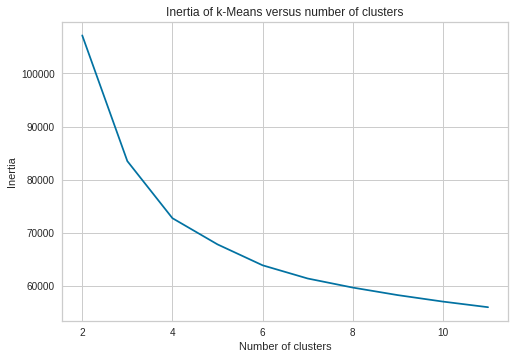

In [140]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(dt_normalizado).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

#### Silhouette: otro método para buscar mejor cantidad de clústeres

Para n_clusters = 2 El silhouette_score promedio es : 0.5594033267872973
Para n_clusters = 3 El silhouette_score promedio es : 0.255798397089822
Para n_clusters = 4 El silhouette_score promedio es : 0.2141802681296889
Para n_clusters = 5 El silhouette_score promedio es : 0.20459930123768896
Para n_clusters = 6 El silhouette_score promedio es : 0.1902997438665994
Para n_clusters = 7 El silhouette_score promedio es : 0.1767061702337541


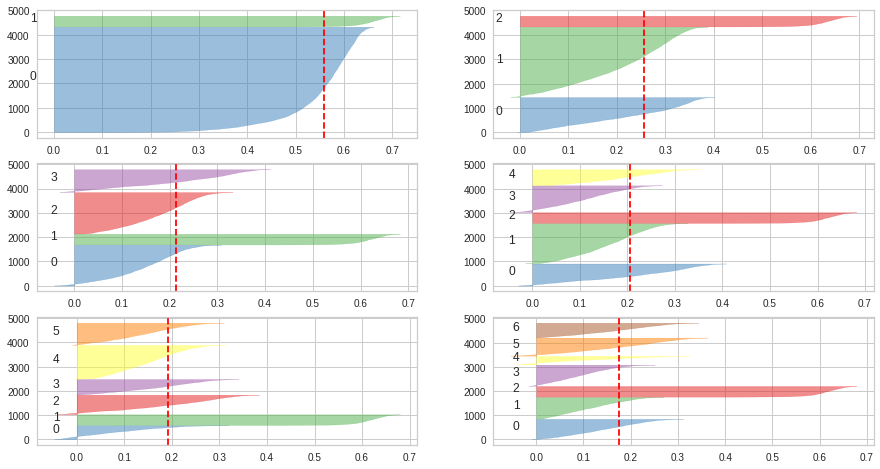

In [141]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for n_clusters in range(2,8):
    km2 = KMeans(n_clusters=n_clusters)
    cluster_labels = km2.fit_predict(dt_normalizado)
    
    silhouette_avg = silhouette_score(dt_normalizado, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)
    
    q, mod = divmod(n_clusters, 2)
    
    visualizer = SilhouetteVisualizer(km2, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dt_normalizado)

#### Graficamos

In [142]:
data=[]
bool_crack=df_n["overall"] > 90
bool_no_crack=df_n["overall"]<91


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[24]
skill_2=skills_ratings[27]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='attacking_short_passing'),
                yaxis=dict(title='skill_ball_control'),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#iplot(fig)

In [143]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1) #Nosotros elegimos 4 clusters

Kmeans encontró:  4


In [144]:
df_clusters.kmeans.unique()

array([0, 1, 3, 2], dtype=int32)

In [145]:
#Media de las variables por cluster
media_clusters = df_clusters.groupby(by='kmeans',as_index=False).mean()
media_clusters.head()

,kmeans,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,team_position_label,preferred_foot_label,nationality_label
0,0,208008.69,27.02,179.22,74.31,74.83,77.27,8480357.14,27763.69,1.38,3.37,3.36,16573921.57,18.12,2021.45,13.69,75.82,71.40,66.94,75.00,37.60,65.43,nan,nan,nan,nan,nan,nan,64.75,71.98,60.97,70.72,66.78,75.22,67.21,60.17,60.79,75.24,76.06,75.62,76.16,71.70,71.88,74.15,66.68,69.96,66.10,68.95,57.58,35.16,73.65,68.59,66.97,71.21,36.96,34.35,30.32,10.57,10.64,10.66,10.51,10.50,22.12,0.76,51.08
1,1,190694.27,29.62,189.13,83.87,75.40,77.23,6549636.36,22443.18,1.39,2.64,1.00,12614184.47,15.29,2021.31,10.23,nan,nan,nan,nan,nan,nan,75.77,72.72,70.28,77.22,44.46,74.33,14.95,13.18,14.91,30.35,13.71,15.40,15.74,15.03,29.47,22.77,44.49,44.45,46.30,71.14,44.95,52.85,64.92,33.93,65.98,13.96,29.43,19.72,12.76,46.47,22.18,53.89,16.90,14.58,14.35,75.77,72.72,70.28,74.33,77.22,13.14,0.86,55.23
2,2,206495.53,27.62,186.32,80.59,74.10,76.65,5754054.78,21162.19,1.25,2.85,2.11,11152167.82,14.53,2021.41,8.90,59.20,41.20,55.53,57.23,73.71,75.59,nan,nan,nan,nan,nan,nan,47.20,35.02,72.47,66.19,34.87,53.48,41.57,37.34,61.81,62.49,57.72,60.39,55.35,69.54,54.26,56.63,72.74,68.46,79.36,40.38,75.66,73.37,40.81,48.44,44.56,67.28,73.22,75.02,72.73,10.67,10.85,10.72,10.80,10.66,18.22,0.78,49.98
3,3,205491.00,27.37,179.63,74.42,75.39,77.70,8477565.98,31578.89,1.42,3.18,3.01,16494338.36,17.33,2021.50,12.01,69.93,62.24,71.00,72.86,69.70,72.22,nan,nan,nan,nan,nan,nan,69.07,57.32,62.31,75.17,56.16,72.10,66.37,59.08,71.36,74.65,70.20,69.69,71.64,73.35,70.88,71.57,69.26,77.81,69.38,65.37,72.94,71.16,66.07,69.41,58.45,72.48,69.23,71.75,68.98,10.62,10.64,10.79,10.74,10.64,18.39,0.71,55.05


In [146]:
#Buscamos variables que tengan mucho desvío entre clusters, para poder graficarlas mejor
for i in range(len(skills_ratings)):
  if media_clusters[skills_ratings[i]].std()>20:
    print(skills_ratings[i] + ' Desvio ' + str(media_clusters[skills_ratings[i]].std()))

attacking_crossing Desvio 24.58730951673618
attacking_finishing Desvio 25.758017444491383
attacking_heading_accuracy Desvio 25.688882359472515
attacking_short_passing Desvio 20.500143522846585
attacking_volleys Desvio 23.541300106931267
skill_dribbling Desvio 27.497053899365024
skill_curve Desvio 24.41274842017599
skill_fk_accuracy Desvio 21.34962838213961
skill_ball_control Desvio 24.72120098981091
power_long_shots Desvio 25.5261439387874
mentality_aggression Desvio 21.199742674789935
mentality_interceptions Desvio 26.655020358579993
mentality_positioning Desvio 27.554772725904115
defending_marking Desvio 26.9010276558483
defending_standing_tackle Desvio 29.404520102299443
defending_sliding_tackle Desvio 28.799074844106492
goalkeeping_diving Desvio 32.57267601229235
goalkeeping_handling Desvio 31.002385041208335
goalkeeping_kicking Desvio 29.77767840451394
goalkeeping_positioning Desvio 31.825331556495513
goalkeeping_reflexes Desvio 33.31169795710778


In [147]:
#Encuentra skills con poca varianza dentro del cluster pero mucha diferencia entre clusters
for i in range(len(skills_ratings)):
  intervarianza=media_clusters[skills_ratings[i]].std()
  var_k0=df_clusters[df_clusters.kmeans==0][skills_ratings[i]].std()
  var_k1=df_clusters[df_clusters.kmeans==1][skills_ratings[i]].std()
  var_k2=df_clusters[df_clusters.kmeans==2][skills_ratings[i]].std()
  var_k3=df_clusters[df_clusters.kmeans==3][skills_ratings[i]].std()
  if (var_k0<10) & (var_k1<10) & (var_k2<10)  & (var_k3<10) & (intervarianza>10):
    print(str(i) + '-' +skills_ratings[i] + ':' + str(var_k0) + ' - ' + str(var_k1) + ' - '+ str(var_k2) + ' - '+ str(var_k3) + ' - ' + str(intervarianza) )

3-attacking_short_passing:5.849118598339018 - 8.677780088265797 - 6.398660213123737 - 4.9846015279220985 - 20.500143522846585
9-skill_ball_control:5.060694012016915 - 6.4811544827508545 - 6.765083078008304 - 4.907522386051926 - 24.72120098981091
29-goalkeeping_diving:3.135174663965731 - 4.509895128399929 - 3.463238979782454 - 3.6824314118262245 - 32.57267601229235
30-goalkeeping_handling:3.0891073981699275 - 4.729948358317937 - 3.338652997359986 - 3.5229472693841393 - 31.002385041208335
31-goalkeeping_kicking:3.148576918985015 - 6.407323527146753 - 3.6550239182425646 - 3.415349644231263 - 29.77767840451394
32-goalkeeping_positioning:3.1526448874615616 - 4.664496482836385 - 3.522680977279304 - 3.7051588436821783 - 31.825331556495513
33-goalkeeping_reflexes:3.210316017407065 - 4.709843500844109 - 3.298109049340378 - 3.383171033319116 - 33.31169795710778


### 2. Mean Shift

In [175]:
ms = MeanShift(bandwidth=4)

ms.fit(dt_normalizado)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters


Numero estimado de clusters para Mean Shift : 29


In [176]:
data=[]
bool_crack=df_n["overall"] > 90
bool_no_crack=df_n["overall"]<91


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[3]
skill_2=skills_ratings[9]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=800,height=800)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [177]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  29 clusters, según los hiperparámetros elegidos


In [178]:
#Encuentra skills con poca varianza dentro del cluster pero mucha entre clusters
var_k=df_clusters.groupby(by='MeanShift',as_index=False).std()[skills_ratings[0]]
for i in range(len(skills_ratings)):
  for k in range(n_clusters_):
    var_k[k]=df_clusters[df_clusters.MeanShift==k][skills_ratings[i]].std()
  if (var_k[var_k.values<10].count()>n_clusters_-2) & (df_clusters[skills_ratings[i]].std()>10):
    print(skills_ratings[i] + ': ' + str( var_k.values.std() ) + '- STD entre Clusters: ' + str(df_clusters[skills_ratings[i]].std()))

### 3. Cityblock

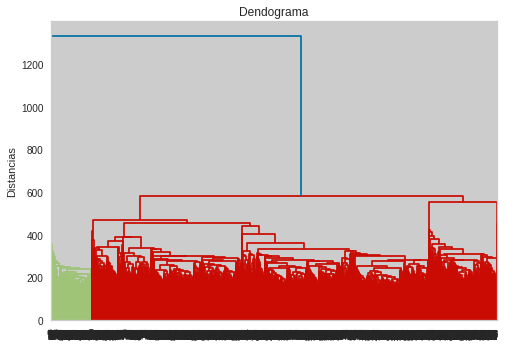

In [155]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_skills, metric = "cityblock", method = "average"))

plt.title('Dendograma')
plt.ylabel('Distancias')
plt.show()

## 4. Análisis de los clusters encontrados.


In [152]:
#Veamos si los grupos tienen alguna relación con la posicion de los jugadores:
plt.figure(figsize=(10,6))
contingencia0 = pd.crosstab(df_clusters.kmeans, df_clusters.team_position)
contingencia0

team_position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB
kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96,0,1,7,2,0,12,0,0,34,2,8,132,83,67,2,11,0,0,19,1,94,5,109,88,62,1,213,595
1,0,0,0,0,0,279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,131
2,0,33,12,0,1,0,0,19,221,4,16,0,1,0,0,1,0,24,230,6,14,44,0,0,0,0,4,0,282
3,52,7,69,2,27,0,1,145,35,116,81,3,32,1,4,11,2,152,32,133,81,90,2,43,0,7,12,3,532


<Figure size 720x432 with 0 Axes>

In [153]:
plt.figure(figsize=(10,6))
contingencia2 = pd.crosstab(df_clusters.kmeans, df_clusters.skill_moves)
contingencia2

skill_moves,1,2,3,4,5
kmeans,,,,,
0,0,56,1004,582,38
1,440,0,0,0,0
2,0,825,106,0,0
3,0,228,1236,234,7


<Figure size 720x432 with 0 Axes>

In [168]:
df_clusters.groupby(by=['MeanShift']).size()

MeanShift
0    4283
1     440
2      32
3       1
dtype: int64

## 5. Embeddings y técnicas de clustering.

## 6. Evaluación

## 7. Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?